# eBay Assistant v2 | Development Notebook

In [1]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
load_dotenv()
import openai
from IPython.display import Markdown, display, HTML, Image

os.chdir(os.path.dirname(os.getcwd()))

In [2]:
from src.doc_store.ebay_scraper import eBayWebSearch, AverageSalePrice, eBayProduct

query = 'Vintage Appleton Industrial Vented Light Fixture'

In [3]:
search_results = eBayWebSearch(query)

In [6]:
search_results

[eBayProduct(ebay_id=296311571535, item=Item(title='New ListingAppleton Electrical A-51 Series Vintage Vented Explosion Proof Light Fixture', link=Url('https://www.ebay.com/itm/296311571535?itmmeta=01HSMF8ARW1TF2QA4XA3XKHR62&hash=item44fd8bc44f:g:kHwAAOSwTOFkbNMV&itmprp=enc%3AAQAJAAAA4FGX9ODuhCrKogxOav3p03TLy9LWb0lPrqjpbUdQWQpQAaFj%2FM7CCHy2ZmGUlXRdyU3sWxgTIlWcQehTrDv52%2B1irJRYFk4twrLyZGNhtIDix7jqGWK1LTwcFWFdexTtqHU8tIlBWC%2BXGg1s69AwNP8ZTsHdMXWq2w623ShtHjLTpLzg5PFWkfcDB4qidKQav9is0qIe%2BJPXL8A4AbJE3llF0okND0dqJI2f1y5%2FYwCsJxJjkyqBtCDCjRt%2BM%2FMbp1t2Ryp1G2KDAkDvJ9K5YnAAQ5T7WQAA7HPCaKWF%2B4C5%7Ctkp%3ABk9SR8KsoY_NYw'), price=99.0, image_url=Url('https://i.ebayimg.com/thumbs/images/g/kHwAAOSwTOFkbNMV/s-l300.webp'), description="eBay\nAppleton Electrical A-51 Series Vintage Vented Explosion Proof Light Fixture.\nStep back in time with this incredible vintage Appleton A-51 Explosion-Proof Light, a remarkable piece of industrial history that will add a touch of authenticity to any space. 

In [13]:
print(search_results[5])

Vintage Heavy Duty Metal Appleton Form 100 Industrial Light with Cage & Glass
None
$39.99
+$11.99 shipping

Item description from the seller:
Vintage Heavy Duty Metal Appleton Form 100 Industrial Light with Cage & Glass. Great bones. I don't see any rust. You could easily clean and and repaint it if you want

eBay item number: 315236187891
Listing URL: https://www.ebay.com/itm/315236187891?itmmeta=01HSMF8ARXAX4ZSCK4279VHJ20&hash=item49658a7ef3:g:oxsAAOSwi5hlz4h1&itmprp=enc%3AAQAJAAABAD%2B6plZyxgLIA2Xt%2Byv697vizbccrUHeb6MR6tHufJQR6bf1rXfll%2BHmr5cjt%2BJ5eACx7QWAgvBRyiZO0tWbJlLu9x3jLn7qtUTkKQJMOMoM1oxqq0GRwwIeq7h5FhfuEsp4e9lgBuNBWla160%2F1XpB7yeJJinCuhk%2FD%2BYPtCV0df6EfpGTArn4xf2bbHVgUTdf9oUWMPPnbrzACuO25xbi53ValH9WTowuoVcbrUNGNSIR3xGSiF9yi0xm7DAaJ%2BMnKv%2BNZd7nYYFOogXhufcosNVDILM1a5Zq6C3g8XZoYZBpNIe%2FQUi7%2FHcQAw7K9g%2BUU6AGJ7ennbWt%2Ff049N30%3D%7Ctkp%3ABk9SR8KsoY_NYw
Image URL: https://i.ebayimg.com/thumbs/images/g/oxsAAOSwi5hlz4h1/s-l300.webp
--------------------------------------

In [8]:
response = session.get("https://www.ebay.com/itm/386723431936")
item = parse_product(response)
item['variants'] = parse_variants(response)
print(json.dumps(item, indent=2))

{
  "url": "https://www.ebay.com/itm/386723431936",
  "id": "386723431936",
  "price": "US $34.99",
  "name": "VTG Appleton A-51 Vented Explosion-Proof Industrial Light - Man Cave Garage Bar",
  "seller_name": "TheTwelveBlades",
  "seller_url": "https://www.ebay.com/str/thetwelveblades",
  "photos": [
    "https://i.ebayimg.com/thumbs/images/g/9QwAAOSwpDlluDud/s-l500.jpg",
    "https://i.ebayimg.com/images/g/9QwAAOSwpDlluDud/s-l1600.png"
  ],
  "description_url": "https://vi.vipr.ebaydesc.com/itmdesc/386723431936?t=0&category=26219&seller=thetwelveblades&excSoj=1&excTrk=1&lsite=0&ittenable=true&domain=ebay.com&descgauge=1&cspheader=1&oneClk=2&secureDesc=1",
  "features": {
    "Condition": "",
    "Seller Notes": "",
    "Brand": "",
    "UPC": ""
  },
  "variants": {}
}


In [2]:
query = 'Vintage Appleton Industrial Vented Light Fixture'

In [8]:
from marvin.beta.assistants import Assistant
import requests
from bs4 import BeautifulSoup
from urllib.parse import unquote
from readabilipy import simple_json_from_html_string
from langchain.schema import Document

# # Define a custom tool function
def visit_url(url: str):
    """Fetch the content of a URL"""
    return requests.get(url).content.decode()

# Integrate custom tools with the assistant
ai = Assistant(tools=[visit_url])
run = ai.say(
    f"Please conduct pricing research on following item. Return 1 or 2 comps only, and please do not use eBay: {query}",
    event_handler_kwargs=dict(print_steps=False),
)

In [28]:
from src.utils import llm

In [3]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import unquote
from readabilipy import simple_json_from_html_string
from langchain.schema import Document

from src.doc_store.ebay_scraper import eBayWebSearch, AverageSalePrice, eBayProduct

* Test "query" based on an item description from the existing app

In [4]:
query = 'Vintage Appleton Industrial Vented Light Fixture'

* The `AverageSalePrice` function searches the eBay API for sold items matching a description
* It excludes extreme outliers, then calculates average selling price (broken down by item cost & shipping) across all results
* Filters can be adjusted as needed, and the actual items can be brought in as well

In [5]:
averagePrice = AverageSalePrice(query=query, country='us', condition='all')
print(averagePrice)

Item Description: Vintage Appleton Industrial Vented Light Fixture
Average Price (based on 54 sold items):
* Item: $69.01 ($2.886 to $195.0)
* Shipping: $14.76 ($0.0 to $46.85)
* Total: $83.77


In [9]:
def get_pricing_stats(item: str) -> str:
    """Fetch the average selling price for a given item"""
    return str(AverageSalePrice(query=item, country='us', condition='all'))

In [10]:
from marvin.beta.assistants import Assistant, Thread, CodeInterpreter

ai = Assistant(tools=[get_pricing_stats])

run = ai.say(
    f"Please fetch pricing stats on the following item and summarize the results. Run the original item along with 2 other variations that you modified in a SEO way.\nORIGINAL ITEM: {query}",
)

Output()

Output()

In [11]:
def search_listings(query: str):
    """Run an eBay search query and return the top 5 results"""
    search_results = eBayWebSearch(query)
    return str(search_results[:4])

In [12]:
ai = Assistant(tools=[search_listings])

run = ai.say(
    f"Please search eBay listings for the following item and summarize the results as a nicely formatted and structred report\nITEM: {query}",
)

Output()

[03/22/24 20:28:49] ERROR    marvin.Runs: Error calling function search_listings: [Errno 11001]         ]8;id=692909;file://c:\Users\pdoub\opinionated-rag\.venv\lib\site-packages\marvin\beta\assistants\runs.py\runs.py]8;;\:]8;id=235960;file://c:\Users\pdoub\opinionated-rag\.venv\lib\site-packages\marvin\beta\assistants\runs.py#183\183]8;;\
                             getaddrinfo failed                                                                    

Output()

In [22]:
target_image = "https://i.ebayimg.com/thumbs/images/g/9QwAAOSwpDlluDud/s-l300.jpg"
display(Image(url=target_image))

In [23]:
import marvin
from pydantic import BaseModel, Field


class eBayListingItem(BaseModel):
    """An item for sale on eBay"""
    title: str = Field(description="A concise tag-line style title for the item.")
    inspection: str = Field(description="A detailed inspection of the item in the image. It should be particularly detailed on anything that impact the price.")
    seo_style_ebay_listing: str = Field(description="A SEO focused compelling description of the item. It should be engaging and interestig to read while staying true to the item. ")

img = marvin.beta.Image(
    target_image
)
result = marvin.beta.cast(
    data=img, 
    target=eBayListingItem,
    instructions="You are a wold class eBay seller, an expert at vividly describing items and crafting irresistable listing descriptions.",
)

In [27]:
display(Markdown(result.title))
display(Markdown(result.inspection))
display(Markdown(result.seo_style_ebay_listing))

Authentic Vintage Industrial Pendant Light with Aged Patina

This vintage industrial-style pendant light exhibits a conical metal top with a weathered silver-gray finish, presenting authentic rust and signs of wear. The red metal plaque, though faded, adds to its antique charm. The ribbed clear glass bulb cover is intact, but the fixture has exposed wiring that suggests a need for rewiring or additional parts for full functionality.

Step back in time with this genuine vintage industrial pendant light, a testament to timeless style and rugged durability. The weathered silver-gray finish and authentic rust patina tell a story of years gone by, while the faded red plaque whispers secrets of its past. Designed to illuminate with character, this piece is a conversation starter, awaiting its new home to shine once more. Note: This piece requires some love to restore its full glow, as it currently needs rewiring. A treasure for antique lovers and restoration enthusiasts alike!

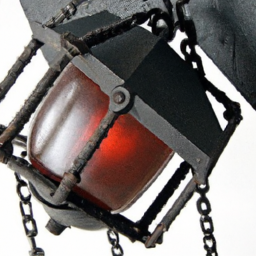

In [30]:
image_test = llm.prompt_image_gen(
    prompt=str(result.seo_style_ebay_listing),
    model="dall-e-2",
    size_category="small",
    style="natural",
)
image_path = image_test.get('file_path')
display(Image(filename=image_path))

* The `eBayWebSearch` function works the same as searching eBay via a browser
* Given a query it returns a list of `eBayProduct` objects shown below
* Results can be formatted and easily added to an OpenAI prompt
* **Note:** Search results **contain links** to the primary image for the listing - GPT-4 with vision can **read images from links!**

In [13]:
search_res = eBayWebSearch(query)
len(search_res)

53

In [14]:
str(search_res[0])

'VTG Appleton A-51 Vented Explosion-Proof Industrial Light - Man Cave Garage Bar\nPre-Owned\n$34.99\n+$14.45 shipping\n\nItem description from the seller:\nTransform your space with this vintage Appleton Electric A-51 Vented Explosion-Proof Industrial Light Fixture - a perfect addition to your man cave, industrial garage, or home bar decor!\nCrafted by the reputable Appleton Electric Company, this fixture boasts a unique blend of industrial charm and safety features. The vented design ensures both functionality and a touch of nostalgia, making it an ideal choice for enthusiasts seeking authentic vintage decor.\nKey Features:\nManufacturer & Model: Appleton Electric Company, A-51 Series Vented.\nMaterial: Durable metal body, likely aluminum, for corrosion resistance.\nSafety Certification: UL and CSA certified, meeting safety standards for hazardous locations.\nVoltage & Lamp Support: Supports up to 300 volts, compatible with various lamp types (up to 200 watts).\nMounting Instructions:

* Example of the `eBayProduct` search result

In [8]:
search_res[1].model_dump()

{'ebay_id': 386723431936,
 'item': {'title': 'VTG Appleton A-51 Vented Explosion-Proof Industrial Light - Man Cave Garage Bar',
  'link': Url('https://www.ebay.com/itm/386723431936?itmmeta=01HSFG0JX4H11J909184APQ0CJ&hash=item5a0a834600:g:9QwAAOSwpDlluDud&itmprp=enc%3AAQAJAAABAPHSNGyQoO8pN8WmNRMHCIlNDmpuUw3yIBE1EGfu6VylzD0sxM2rFFpzuAbB1qudD9ipViG8rb02Tf%2B5YuTSw59fy7hbFG1d049FkuglOBFTrLDp0q92EBU8lCS16CFpf8SCTL0ITlNUF%2BN6bL5H690Y6xDXMranw%2BMMfyX71NPn9Eqzg3dqC2j5%2BRbkRwPWotgOqLN%2F5yLM7UeW7RkuawkYshQyVm9jkXRuMH0zLjbHqBxhYA4FFKBWQautXvAHk8suuRsFzbbWbbd9ODL01CQw9B1tR%2B0Q80Of6nLDsJliQSrOTy3GdrmIO4awYbol6g3pqabo08O1Sg3LeDYs4nw%3D%7Ctkp%3ABk9SR9iugvDLYw'),
  'price': 34.99,
  'image_url': Url('https://i.ebayimg.com/thumbs/images/g/9QwAAOSwpDlluDud/s-l300.jpg'),
  'description': 'eBay\nTransform your space with this vintage Appleton Electric A-51 Vented Explosion-Proof Industrial Light Fixture - a perfect addition to your man cave, industrial garage, or home bar decor!\nCrafted by the reput

* Example of formatted search results

In [9]:
for i in range(len(search_res[:4])):
    print(search_res[i])

New ListingVintage Explosion Proof Appleton Form 200 Caged Light Vintage Industrial Light 
Pre-Owned
$0.99
+$9.62 shipping

Item description from the seller:
I have a vintage Appleton form 200 shatter proof industrial light.  It's in working order has a nice petina on it

eBay item number: 315238138464
Listing URL: https://www.ebay.com/itm/315238138464?itmmeta=01HSFG0JX4VN7J3HZWHR6KZEK2&hash=item4965a84260:g:UIgAAOSw7etl-13U&itmprp=enc%3AAQAJAAAA4DrAwVvpfGvAB0hvnjj%2B%2Brh3zEuFZ%2B2DqG3XRxkG52INlcUPDGNrekbwNyfs120mlFigGjSAeEyASjkuNHXAPXpp3XnMx5PrAvmo0qEQgbTmdLH7%2B%2BjVATwJrV1kj%2Fqf9nqbUCgc66nN5wlnMu%2BtpOa4sf6rAM%2FZE8a%2BtPxxXJBixdbdZj7sCSgIlfzCmaWhjzUhybGdYiu4AJszxrXwWrpwCTLqTT%2B0XKfssVhwXQQ4Q15OU88eoZPuczZ9N4FLLiGc5vtJSuJzk1WW5yawAjofq5g8%2Fdl12wUdrweKK4wU%7Ctkp%3ABk9SR9iugvDLYw
Image URL: https://i.ebayimg.com/thumbs/images/g/UIgAAOSw7etl-13U/s-l300.jpg
--------------------------------------------------
VTG Appleton A-51 Vented Explosion-Proof Industrial Light - Man Cave Garage 

* Example showing `eBayProduct` sorted by price (ascending or descending)

* Least expensive

In [10]:
sorted_results = eBayProduct.sort_by_price(search_res, reverse=False)
for i in range(len(sorted_results[:4])):
    print(sorted_results[i])

New ListingVintage Explosion Proof Appleton Form 200 Caged Light Vintage Industrial Light 
Pre-Owned
$0.99
+$9.62 shipping

Item description from the seller:
I have a vintage Appleton form 200 shatter proof industrial light.  It's in working order has a nice petina on it

eBay item number: 315238138464
Listing URL: https://www.ebay.com/itm/315238138464?itmmeta=01HSFG0JX4VN7J3HZWHR6KZEK2&hash=item4965a84260:g:UIgAAOSw7etl-13U&itmprp=enc%3AAQAJAAAA4DrAwVvpfGvAB0hvnjj%2B%2Brh3zEuFZ%2B2DqG3XRxkG52INlcUPDGNrekbwNyfs120mlFigGjSAeEyASjkuNHXAPXpp3XnMx5PrAvmo0qEQgbTmdLH7%2B%2BjVATwJrV1kj%2Fqf9nqbUCgc66nN5wlnMu%2BtpOa4sf6rAM%2FZE8a%2BtPxxXJBixdbdZj7sCSgIlfzCmaWhjzUhybGdYiu4AJszxrXwWrpwCTLqTT%2B0XKfssVhwXQQ4Q15OU88eoZPuczZ9N4FLLiGc5vtJSuJzk1WW5yawAjofq5g8%2Fdl12wUdrweKK4wU%7Ctkp%3ABk9SR9iugvDLYw
Image URL: https://i.ebayimg.com/thumbs/images/g/UIgAAOSw7etl-13U/s-l300.jpg
--------------------------------------------------
Vintage Appleton Light Fixture Clear Ribbed Glass Globe & Cage Unknown Model

* Most expensive

In [11]:
sorted_high_results = eBayProduct.sort_by_price(search_res, reverse=True)
for i in range(len(sorted_high_results[:4])):
    print(sorted_high_results[i])

Set of 4 Appleton 12" Porcelain Flush Mount Industrial Green Enamel Barn Light
Pre-Owned
$660.0
+$25.00 shipping

Item description from the seller:
SOLD AS A SET OF FOUR
The absolute perfect light for lower ceilings. Excellent for use in hallways, small rooms or almost any room with four ceiling boxes. Garages are also a good spot for these. Lot's of garages need exactly four of these. Also, the overhead garage door will miss these!
Nice little lights, perfect for 8 foot or lower ceiling as they only need 6 inches of space.
These heavy porcelain covered steel light fixtures were manufactured by Appleton,  Circa 1936 patent.
Push and turn to lower the shade for cleaning.  A clean shade shines brighter.
All I had to do was clean the shades, disassemble, re-wire and reassemble.
The shades are 12 inches in diameter. The total height is only  inches.
In order to safely ship the lights, they will be disassembled, to be easily reassembled by the buyer.
Please feel free to ask questions prior 

## Image comparison test

* Send multiple images to GPT-4

* Target image to compare against

In [18]:
target_image = "https://i.ebayimg.com/thumbs/images/g/9QwAAOSwpDlluDud/s-l300.jpg"
display(Image(url=target_image))

* First a bad comp we would not want to use

In [14]:
bad_comp_image = str(sorted_results[11].item.image_url)
display(Image(url=bad_comp_image))

In [15]:
image_comp_prompt = """
I'm planning to list the item in the first image on eBay and looking for good 'comps' to help determine the price. 
Please review and asses whether the second image is similar enough to use. Include a highly concise explanation as to why.
"""

image_comp = llm.prompt_multi_image_input(
    prompt=image_comp_prompt,
    image_paths=[
        target_image,
        bad_comp_image,
    ]
)
Markdown(image_comp)

No, the second image is not similar enough to use for price comparison. The item in the first image appears to be an industrial or commercial-grade pendant light fixture with a glass diffuser and a metal protective cage. The second item is a smaller, more vintage or aged lantern-like light fixture with a different design – it has a glass enclosure protected by a metal frame and seems to be designed for a different setting and possibly a different purpose.


In [17]:
image_urls = [str(sorted_results[i].item.image_url) for i in range(4)]
for url in image_urls:
    display(Image(url=url))

In [18]:
multi_image_comp_prompt = """
I'm planning to list the item in the first image on eBay and looking for good 'comps' to help determine the price. 
Please review and assess whether the following images are similar enough to use. 
Include the number positions, if any, for the best comps, a highly concise explanation as to why.
"""

test_mutiple_comps = llm.prompt_one_to_many_image_input(
    multi_image_comp_prompt,
    base_img_path=target_image,
    comp_image_paths=image_urls,
)
Markdown(test_mutiple_comps)

Based on the images provided, the following assessments are made for similarity:

Image 2: Not a good comp. It's a different style of light fixture, more nautical and rugged, with a caged design.

Image 3: Not a good comp. While it's an industrial light fixture, it lacks the top housing and overall design is significantly different.

Image 4: Not a good comp. This appears to be a light fixture component in new condition with packaging, which is quite different from the vintage used appearance of the first item.

Image 5: Not a good comp. This is just a component part of a light fixture (possibly a cover or backplate) and does not represent a complete fixture as in the first image.

None of the provided images are particularly good comps for the first item. For accurate pricing on eBay, look for complete industrial light fixtures of a similar vintage and condition with a glass enclosure and metal top similar to the one in the first image.

___

# WIP

In [5]:
def get_llm_response(system='You are a helpful assistant.', user = '', temperature = 0.1, model = 'gpt-3.5-turbo'):
    completion = openai.chat.completions.create(
        model=model,
        temperature=temperature,
        messages=[
            {'role': 'system', 'content': system},
            {'role': 'user', 'content': user},
        ]
    )
    return completion.choices[0].message.content

In [6]:
def create_keyword_query_generation_prompt(topic, n):
    return f"""I'm doing pricing research on **{topic}** and need help coming up with eBay keyword search queries.
eBay keyword searches should just be a few words long. It should not be a complete sentence.
Please generate a diverse list of {n} eBay keyword search queries that would be useful for researching **${topic}**. Do not add any formatting or numbering to the queries."""


In [7]:
def generate_search_queries(topic, n):
    user_prompt = create_keyword_query_generation_prompt(topic, n)
    completion = get_llm_response(
        system='The user will ask you to help generate some search queries. Respond with only the suggested queries in plain text with no extra formatting, each on it\'s own line.',
        user=user_prompt,
        temperature=1
    )
    queries = [s for s in completion.split('\n') if s.strip()][:n]
    return queries

In [8]:
queries = generate_search_queries(query, 2)
queries

['Vintage Appleton Industrial Vented Light Fixture',
 'Appleton Industrial Light Fixture Vintage']

In [9]:
def get_search_results(queries, itemsPerQuery=10):
    """
    Fetches search results for given queries and deduplicates them based on eBay ID.

    Args:
        queries (list): A list of query strings to search for.
        itemsPerQuery (int): The number of items to fetch per query.

    Returns:
        list: A list of deduplicated eBayProduct objects.
    """
    results = []
    seen_ids = set()
    for query in queries:
        search_response = eBayWebSearch(query)
        for product in search_response[:itemsPerQuery]:
            if product.ebay_id not in seen_ids:
                seen_ids.add(product.ebay_id)
                results.append(product)
                
    return results

In [10]:
item_listings = get_search_results(queries)
len(item_listings)

17

In [11]:
print(item_listings[0])

Vintage Appleton Explosion Proof Vented Industrial Ceiling Light Lamp Fixture
Pre-Owned
$39.99
+$35.10 shipping

Item description from the seller:
Vintage Appleton Explosion Proof Vented Industrial Ceiling Light Lamp Fixture
Parts Only - Light is untested
200W - 250V - Type EVA - Catalog AA 99
Measures
8" in dia x
16
" in height (not including threaded rod)
all approx
Fresh Barn Find the Aluminum housing has oxidation
Glass Looks Good - Has a
Porcelain
socket
Down Rod will be removed for shipping
Please study all the photos
Feel Free to ask any questions
Check Back I found more unusual Light Fixtures in this Barn Including a few Holophane shades et

eBay item number: 155896783352
Listing URL: https://www.ebay.com/itm/155896783352?itmmeta=01HRV3ZF0NKYC4CV4MXR74JVBA&hash=item244c2c21f8:g:PrUAAOSwK2xlR49E&itmprp=enc%3AAQAIAAAA4B8%2B2Q1W6ISeGsSM37CcksptgXDgAzaL74Hvnh0stjTGog%2FWSESj7YNo%2Bci6OxmTcGxYXXX5fID%2FNEuQ1QQyhVBJrMOwejiTfJ3sw7%2FA%2BKlc6GZkrU4GjbPSCAdZKGwWmbjSFcp58ZO7ElyJqd3tGVDRI

In [22]:
from openai import OpenAI

client = OpenAI()

def compare_listing_with_image(text: str, base_img_url: str, comp_image_url: str):
    response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
        "role": "user",
        "content": [
            {
            "type": "text",
            "text": "I'm planning to list the item in the first image on eBay and I am looking for good 'comps' to help determine the price. Please review this candidate's text description and image and generate a concise summary explaining why it would or would not make a good comp.",
            },
            
            {
            "type": "text",
            "text": f"Here is the descrition for the candidate: {text}.",
            },
            
            {
            "type": "image_url",
            "image_url": {
                "url": base_img_url,
            },
            },
            {
            "type": "image_url",
            "image_url": {
                "url": comp_image_url,
            },
            },
        ],
        }
    ],
    max_tokens=300,
    )
    return response.choices[0]

In [21]:
str(item_listings[0].item.image_url)

'https://i.ebayimg.com/thumbs/images/g/PrUAAOSwK2xlR49E/s-l300.jpg'

In [27]:
comp_with_image = compare_listing_with_image(text=str(item_listings[0]), base_img_url=target_image, comp_image_url=str(item_listings[0].item.image_url))
Markdown(comp_with_image.message.content)

Based on the information provided and the images of both items, the candidate listing could serve as a reasonable comp (comparable item) for determining the price of your item. Here are the main points that support this:

1. Similar Type of Item: Both are vintage Appleton explosion-proof industrial ceiling light fixtures, which directly aligns them in terms of type and potential use.

2. Condition: The candidate is listed as pre-owned and 'Parts Only - Light is untested,' suggesting it might not be fully functional. When comparing to your item, consider whether your item is in similar condition, better (fully operational), or worse (missing more components or damaged), as this would affect relative value.

3. Aesthetic Condition: The oxidation on the aluminum housing of the candidate is worth noting. Assess the cosmetic condition of your item in comparison. If yours has less wear or is cleaner, this could justify a higher price.

4. Specifications: Both lights appear to share specifications such as "200W - 250V - Type EVA," which is relevant when customers look for specific technical requirements.

5. Size: The measurements of the candidate are provided, which would be useful to compare with your item to ensure they match in terms of size and scale.

6. Shipping Considerations: The candidate listing notes the down rod will be removed for shipping. Determine if your item also has similar shipping considerations that would impact shipping costs or risk of damage in transit.

7. Market Price: The candidate's

In [ ]:
def display_base_models(base_models):
    """
    Display the title, url, and published_date of each BaseModel object in a list.

    Args:
        base_models (List[BaseModel]): List of BaseModel objects.

    """
    for model in base_models:
        print(f"Title: {model.title}")
        print(f"URL: {model.url}")
        print(f"Published Date: {model.published_date}")

In [ ]:
display_base_models(links)

In [ ]:
from bs4 import BeautifulSoup
import re

def clean_html_content(content: str) -> str:
    """
    Clean the HTML content using BeautifulSoup.

    Args:
        content (str): HTML content.

    Returns:
        str: Cleaned text content.
    """
    soup = BeautifulSoup(content, "html.parser")

    # Extract header and paragraph tags
    header_tags = soup.find_all(re.compile(r"^h\d$"))
    paragraph_tags = soup.find_all("p")

    # Strip HTML tags and collect text content
    stripped_content = ""
    for tag in header_tags + paragraph_tags:
        stripped_content += " " + tag.get_text().strip() + " "

    return ' '.join(stripped_content.split())

In [ ]:
def get_page_contents(search_results):
    contents_response = metaphor.get_contents(search_results)
    return contents_response.contents


content = get_page_contents([link.id for link in links])

In [ ]:
def create_web_content_string(search_contents: list, char_limit: int = 30000) -> str:
    """
    Synthesize a report from search contents.

    Args:
        search_contents (list): List of search contents.
        char_limit (int, optional): Total character limit. Defaults to 30000.

    Returns:
        str: Synthesized report.
    """
    total_chars = sum([len(clean_html_content(item.extract)) for item in search_contents])
    inputData = ''

    for item in search_contents:
        cleaned_content = clean_html_content(item.extract)
        item_chars = len(cleaned_content)
        slice_ratio = item_chars / total_chars
        slice_limit = int(char_limit * slice_ratio)
        sliced_content = cleaned_content[:slice_limit]

        inputData += f'--START ITEM--\nURL: {item.url}\nTITLE: {item.title}\nCONTENT: {sliced_content}\n--END ITEM--\n'

    return inputData
    # return get_llm_response(
    #     system='You are a helpful research assistant. Write a report according to the user\'s instructions.',
    #     user='Input Data:\n' + inputData + f'Write a two paragraph research report about {topic} based on the provided information. Include as many sources as possible. Provide citations in the text using footnote notation ([#]). First provide the report, followed by a single "References" section that lists all the URLs used, in the format [#] .',
    #     model='gpt-4' # want a better report? use gpt-4
    # )

In [ ]:
def format_for_markdown(text: str) -> str:
    """
    Formats the given text for markdown.

    Args:
        text (str): The text to be formatted.

    Returns:
        str: The formatted text.
    """
    # Split the text into items
    items = text.split("--END ITEM--")
    
    # Process each item
    formatted_items = []
    for item in items:
        if item.strip() == "":
            continue

        # Remove START ITEM tag and split into lines
        lines = item.replace("--START ITEM--", "").strip().split(" ")

        # Initialize formatted item
        formatted_item = "\n\n"

        # Add each line with a newline at the end
        for line in lines:
            if "URL:" in line or "TITLE:" in line:
                formatted_item += "<br/>" + line
            elif "CONTENT:" in line:
                formatted_item += "<br/>" + line + "<br/>"
            else:
                formatted_item += " " + line

        formatted_items.append(formatted_item.strip())

    return "<br/><br/>".join(formatted_items)

# Your provided text
text = """
--START ITEM-- URL: https://www.stanley12volt.com/ TITLE: HOME | stanley12volt CONTENT: WATCH & LEARN Watch and Learn Learn more about your favorite products! Check out the Watch & Learn Section to see more videos Subscribe for Updates Congrats! You’re subscribed --END ITEM-- --START ITEM-- URL: https://www.woodcraft.com/categories/planes TITLE: Hand Planes for Sale from WoodRiver, Stanley, Veritas & More | Woodcraft CONTENT: Woodworking Hand Planes This Simple Yet Versatile Tool Deserves a Place In Your Workshop Hand Plane Resources & Videos Hand Planes are deceptively simple tools that when used properly can deliver speed and precision not possible with power tools or abrasives. Prior to the introduction of motorized power tools, hand planes bridged the gap between rough lumber and finished projects. A properly tuned hand plane can give you superior results when it comes to smoothing and other fine work. Learn more about this versatile tool through the articles and videos below, and be sure to check out our Woodcraft's Hand Plane Buying Guide! Top of Page --END ITEM-- --START ITEM-- URL: https://www.k-bid.com/auction/44829/item/203 TITLE: Vintage Stanley Woodworking Planer No. 602 CONTENT: Pick up is located at the back entrance of the warehouse.
"""

# Format the text for markdown
formatted_text = format_for_markdown(text)
print(f"{formatted_text}")

In [ ]:
def clean_html_content(content: str) -> str:
    """
    Clean the HTML content using BeautifulSoup.

    Args:
        content (str): HTML content.

    Returns:
        str: Cleaned text content.
    """
    soup = BeautifulSoup(content, "html.parser")

    # Extract header and paragraph tags
    header_tags = soup.find_all(re.compile(r"^h\d$"))
    paragraph_tags = soup.find_all("p")

    # Strip HTML tags and collect text content
    stripped_content = ""
    for tag in header_tags + paragraph_tags:
        stripped_content += " " + tag.get_text().strip() + " "

    return " ".join(stripped_content.split())


def create_web_content_string(search_contents: list, char_limit: int = 9000) -> str:
    """
    Build context for LLM call.

    Args:
        search_contents (list): List of search contents.
        char_limit (int, optional): Total character limit. Defaults to 9000.

    Returns:
        str: Processed internet content.
    """
    total_chars = sum(
        [len(clean_html_content(item.extract)) for item in search_contents]
    )
    internet_content = ""

    for item in search_contents:
        cleaned_content = clean_html_content(item.extract)
        item_chars = len(cleaned_content)
        slice_ratio = item_chars / total_chars
        slice_limit = int(char_limit * slice_ratio)
        sliced_content = cleaned_content[:slice_limit]

        internet_content += f"--START ITEM--\nURL: {item.url}\nTITLE: {item.title}\nCONTENT: {sliced_content}\n--END ITEM--\n"

    return internet_content


def synthesize_report(topic: str, internet_content: str) -> str:
    return openai.chat.completions.create(
        model="gpt-4-1106-preview",
        temperature=1,
        messages=[
            {
                "role": "system",
                "content": "You are a helpful internet research assistant specializing in empowering buyers. You help sift through raw search results to find the most relevant and interesting findings for user topic of interest.",
            },
            {
                "role": "user",
                "content": "Input Data:\n"
                + internet_content
                + f"Write a two paragraph research report about **{topic}** based on the provided search results. One paragraph summarizing the Input Data, and another focusing on the main Research Topic. Include as many sources as possible. ALWAYS cite results using [[number](URL)] notation after the reference. End with a markdown table of all the URLs used. Remember to use markdown links when citing the context, for example [[number](URL)].",
            },
        ],
        )
    


In [ ]:
response = metaphor.search("ceiling drywall",
    num_results=5,
    type='keyword',
    start_published_date="2023-06-12"
)

print(response)

In [ ]:
def researcher(topic, n_queries, n_links_per_query):
    search_queries = generate_search_queries(topic, n_queries)
    print(search_queries)
    search_results = get_search_results(search_queries, 'neural', n_links_per_query)
    search_contents = get_page_contents([link.id for link in search_results])
    internet_content = create_web_content_string(search_contents, 30000)
    report = synthesize_report(topic, internet_content)
    return report